In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 06:52:54.713088: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 06:52:54.716203: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 06:52:54.752549: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 06:52:55.927913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6:09 2s/step - loss: 0.1654

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1061

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0855

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0745

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0668

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0610

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0564

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0525

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0492

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0463

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0438

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0416

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0396

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0378

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0362

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0348

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0335

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0323

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0311

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0301

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0292

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0283

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0275

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0267

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0260

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0253

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0246

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0240

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0235

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0229

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0224

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0219

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0215

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0210

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0206

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0202

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0198

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0194

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0191

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0187

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0184

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0181

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0178

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0175

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0172

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0170

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0167

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0165

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0162

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0160

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0158

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0156

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0153

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0151

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0149

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0148

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146

170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0144 - val_loss: 0.0019


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.3547e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.9329e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 5.5500e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.1432e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.5566e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 6.8734e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.0543e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.2307e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.3330e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.4052e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.4431e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.4724e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.5026e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.5267e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5443e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5524e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5683e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5738e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5757e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5718e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5669e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5601e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5482e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5326e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.5130e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.4918e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.4727e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.4529e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.4323e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.4124e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3989e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3907e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3805e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3681e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3549e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3408e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3256e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3102e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2945e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2780e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2615e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2439e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2261e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.2082e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1905e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1724e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1540e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1356e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1164e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0974e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0797e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0627e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0459e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0291e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.0122e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.9959e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.9801e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.9641e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 6.9588e-04 - val_loss: 0.0012


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.6747e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0146e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1312e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0856e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0055e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.0133e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9704e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8954e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8218e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7708e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7285e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6894e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6514e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6126e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5780e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5516e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5310e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5162e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5253e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.5313e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5409e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5516e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5632e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5754e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5890e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6034e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6170e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6290e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6411e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6529e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6656e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6797e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6919e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7026e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7117e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7188e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7265e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7328e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7382e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7429e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7472e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7511e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7538e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7568e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7596e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7641e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7675e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7708e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7744e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7787e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7827e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7882e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7937e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7999e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8063e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8129e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8191e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.8236e-04 - val_loss: 0.0015


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.9355e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3195e-04

  6/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5197e-04

  9/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6068e-04

 12/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6217e-04

 15/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6137e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.5885e-04

 21/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6028e-04

 24/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6231e-04

 27/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6507e-04

 30/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6721e-04

 33/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6812e-04

 36/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6839e-04

 39/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6911e-04

 42/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.6986e-04

 45/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7058e-04

 48/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7073e-04

 51/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7064e-04

 54/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7084e-04

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7177e-04

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7300e-04

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7468e-04

 66/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7777e-04

 69/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8217e-04

 72/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8687e-04

 75/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9125e-04

 78/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9582e-04

 81/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.0052e-04

 84/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0482e-04

 87/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.0883e-04

 90/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1283e-04

 93/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.1662e-04

 96/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2001e-04

 99/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2315e-04

102/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2621e-04

105/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.2909e-04

108/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.3213e-04

111/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.3509e-04

114/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.3777e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.4026e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.4259e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.4476e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4668e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4839e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5000e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5161e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5311e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5443e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5564e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5671e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5777e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5882e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.5977e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6064e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6138e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6216e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6288e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.6354e-04 - val_loss: 8.4907e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.0490e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5765e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7537e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8302e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8328e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8872e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9248e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9394e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9475e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9573e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9715e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9882e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0152e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0593e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1018e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1396e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1747e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2077e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2396e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2766e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3152e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3494e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3792e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4046e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4258e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4447e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4613e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4756e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4882e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5031e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5183e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5323e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5471e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5616e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5749e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5883e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6031e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6176e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6304e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6426e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6542e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6642e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6729e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6809e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6879e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6947e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7018e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7089e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7162e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7227e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7291e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7364e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7430e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7487e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7542e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7591e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7636e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.7664e-04 - val_loss: 7.2866e-04


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.2237e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7478e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9330e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9723e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0221e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0195e-04

 18/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0066e-04

 20/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9903e-04

 23/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9800e-04

 26/170 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 2.9658e-04

 29/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9814e-04

 32/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0017e-04

 35/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0175e-04

 38/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.0275e-04

 41/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0457e-04

 44/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0731e-04

 47/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0983e-04

 50/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1217e-04

 53/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1439e-04

 56/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1631e-04

 59/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1794e-04

 62/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1941e-04

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2059e-04

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2171e-04

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2276e-04

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2367e-04

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2436e-04

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2480e-04

 83/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2522e-04

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2555e-04

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2578e-04

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2590e-04

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2604e-04

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2610e-04

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2632e-04

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2668e-04

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2721e-04

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2776e-04

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2853e-04

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2933e-04

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3013e-04

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3087e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.3157e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3221e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3285e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3347e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3399e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3449e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3499e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3549e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3600e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3648e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3690e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3734e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3781e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3825e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3871e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.3912e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.3925e-04 - val_loss: 5.6238e-04


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 3.4647e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2424e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4146e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3955e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4088e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4034e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3874e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3603e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3392e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3381e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3382e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3383e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3423e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3513e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3576e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3595e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3613e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3658e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3742e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3866e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3998e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4121e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4219e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4294e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4356e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4389e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4405e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4427e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4456e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4506e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4561e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4618e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4669e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4712e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4747e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4774e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4795e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4838e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4873e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4909e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4940e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4966e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4984e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.4998e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5011e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5037e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5069e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5104e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5132e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5158e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5178e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5193e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5203e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5212e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5215e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5216e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.5215e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.5214e-04 - val_loss: 5.3171e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.3270e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2258e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3049e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4407e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4897e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5306e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5495e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5776e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6211e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6717e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7558e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8345e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9054e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9756e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0364e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1039e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1721e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2327e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2889e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3360e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3772e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4117e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4407e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4650e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4840e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4993e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5147e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5271e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5374e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5463e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5563e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5660e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5749e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5838e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5915e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5982e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6056e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6122e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6173e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6231e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6287e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.6331e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6364e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6391e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6415e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6434e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6452e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6473e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6495e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6519e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6536e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6545e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6550e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6555e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6566e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6579e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.6590e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.6601e-04 - val_loss: 5.7274e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.9967e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4681e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6424e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6759e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6884e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7279e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7431e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7453e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7506e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7521e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7608e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7643e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.7619e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7626e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7703e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7823e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7963e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8126e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8269e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8383e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8526e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8670e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8859e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9040e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9209e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9360e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9525e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9680e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9819e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.9949e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0062e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0160e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0251e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0331e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0413e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0497e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0579e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0658e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0732e-04

117/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0781e-04

120/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0851e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.0921e-04

126/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0996e-04

129/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1064e-04

132/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1123e-04

135/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1183e-04

138/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1241e-04

141/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1296e-04

144/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1351e-04

147/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1403e-04

150/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1452e-04

153/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1497e-04

156/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1534e-04

159/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1569e-04

162/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1601e-04

165/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1628e-04

168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1650e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1668e-04 - val_loss: 4.4079e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.3972e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0784e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0501e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0837e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1459e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1906e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2228e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2368e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2401e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2493e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2943e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3588e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4114e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4514e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4823e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5114e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5385e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5636e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5831e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5984e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6108e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6199e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6291e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6382e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6463e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6575e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6673e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6772e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6865e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6943e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7015e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7077e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7136e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7189e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7245e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7296e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7347e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7401e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7452e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7496e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7532e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7568e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7604e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7643e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7679e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7720e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7762e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7803e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7839e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7874e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7911e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7949e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7982e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8011e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8036e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8056e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.8081e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.8097e-04 - val_loss: 5.8709e-04


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.6526e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7997e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9533e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2422e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3497e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4119e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4390e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4804e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5094e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5204e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5345e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5480e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.5592e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5658e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5694e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5696e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5673e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5663e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5679e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5709e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5734e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5768e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5794e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5812e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5820e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5814e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5812e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5821e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5855e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5899e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5942e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5981e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6023e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6059e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6098e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6132e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6162e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6186e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6210e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6233e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6265e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6298e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6330e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6361e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6392e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6418e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6444e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6474e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6510e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6548e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6586e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6623e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6659e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6696e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6729e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6759e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6788e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6806e-04 - val_loss: 4.8184e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.1401e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8204e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9479e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0502e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1712e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2301e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2951e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3478e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.3879e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4217e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4439e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.4650e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4744e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4810e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4916e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5054e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5180e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5260e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5319e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5358e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5390e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5413e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5435e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5475e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5522e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.5604e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5669e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5719e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5762e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5803e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5844e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5881e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5920e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5951e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5976e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6003e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6033e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6061e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6087e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6106e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6118e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6126e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6128e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6125e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6117e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6113e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6113e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6111e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6109e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6107e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6103e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6096e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6089e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6085e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6081e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6080e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6084e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6092e-04 - val_loss: 0.0013


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 5.8469e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.9648e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.5072e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1407e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.8656e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6630e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5066e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.3856e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2939e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2178e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1491e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0901e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0363e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9907e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9549e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9226e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8944e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8695e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8474e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8256e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8072e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7898e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.7751e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7606e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7467e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7341e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7238e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7149e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7100e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7061e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7023e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6985e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6944e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6909e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6884e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6871e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6865e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6869e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6891e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6913e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6931e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6946e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6959e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6971e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6979e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6985e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6989e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6993e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6992e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6987e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6977e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6969e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6964e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6961e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6966e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6988e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7009e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7021e-04 - val_loss: 8.7860e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.1952e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1765e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5059e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5688e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6063e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6080e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5893e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5768e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6109e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6399e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6526e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.6551e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6653e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6755e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6888e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6943e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6972e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.6981e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7005e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7033e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7059e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7073e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7094e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7094e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7092e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7081e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7058e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7034e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7004e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6969e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6942e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6911e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6881e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6849e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6813e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6776e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6738e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6702e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6666e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6630e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6596e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6557e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6515e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6473e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6436e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6405e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6379e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6363e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6348e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6333e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6317e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6316e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6316e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6313e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6310e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6306e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6300e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6294e-04 - val_loss: 5.0772e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.1712e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3989e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4315e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4866e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6210e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6861e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7466e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8031e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8371e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8631e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8786e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8825e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.8903e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9052e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9290e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9522e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9805e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0105e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0430e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0768e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1093e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1392e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1658e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1879e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2039e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2158e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.2239e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2293e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2334e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2369e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2392e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2399e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2396e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2383e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.2355e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2318e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2279e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2235e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2186e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2132e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2082e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2032e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1978e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1919e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1861e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1811e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1760e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1703e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1642e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1579e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1516e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1465e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1415e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1366e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1318e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1272e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1229e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.1199e-04 - val_loss: 3.7672e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.2328e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9956e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8786e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8861e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8837e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8737e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.8815e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9320e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9813e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0213e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0470e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0659e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0810e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.0937e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1079e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1220e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1353e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1488e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1609e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1704e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1784e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1859e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1927e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1982e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2026e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2084e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2144e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2194e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2236e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2272e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2302e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2324e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2345e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2362e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2377e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2397e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2420e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2451e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2482e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2509e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2530e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2545e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2558e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2565e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2572e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2579e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2597e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2619e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2644e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2668e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2688e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2706e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2731e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2758e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2788e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2818e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2849e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2870e-04 - val_loss: 3.6017e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.1778e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.9404e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1190e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2292e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2746e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2984e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2962e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2897e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2701e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.2362e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1988e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.1695e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1434e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1160e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0877e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0617e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.0340e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0085e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9821e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9571e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9342e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9112e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8905e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8712e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8543e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8389e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8293e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8197e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8112e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.8043e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7978e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7909e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7837e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7761e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7687e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7615e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7541e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7466e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7391e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7315e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7243e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7174e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7106e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.7043e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6983e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6928e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6874e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6823e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6772e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6724e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6678e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6631e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6584e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6543e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6504e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6467e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.6430e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.6404e-04 - val_loss: 3.7208e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.4331e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4524e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.5732e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.6879e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8259e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9441e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0111e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0612e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1057e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1346e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1566e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1708e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1771e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1797e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1832e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1870e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1898e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1911e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.1924e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2002e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2086e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2153e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2223e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2283e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2343e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2396e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2458e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2529e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2596e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2650e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2689e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2712e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2738e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2764e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2799e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2821e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2842e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2857e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2873e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2886e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2896e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.2901e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2922e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2946e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2971e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.2999e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3025e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3054e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3088e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3127e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3166e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3202e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3234e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3264e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3293e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3319e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3342e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.3355e-04 - val_loss: 5.0487e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.1781e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4111e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4191e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6834e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7971e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9277e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0047e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0259e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0176e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0001e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9736e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9457e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9159e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8882e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8658e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8658e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8614e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8536e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8435e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8323e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8195e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.8057e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7906e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7762e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7623e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7495e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.7394e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7297e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7210e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7119e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.7023e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6924e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6826e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6725e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6631e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6541e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6452e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6362e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6274e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6193e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6117e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.6048e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5986e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5935e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5887e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5840e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5799e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5758e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5726e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5693e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5664e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5637e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5611e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5583e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5552e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5520e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5488e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5468e-04 - val_loss: 4.3129e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.3072e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4952e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3437e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2691e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1755e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1511e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1374e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1473e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1579e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1631e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.1836e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2171e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.2520e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.2867e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3162e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3389e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3570e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3717e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.3885e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4069e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4235e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4401e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4543e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4675e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4798e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4902e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.4991e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5093e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5184e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5260e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5320e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5369e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5403e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5435e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5458e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5473e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5482e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5496e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5503e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5507e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5511e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2.5513e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5510e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5511e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5507e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5497e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5486e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5473e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5469e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5470e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5469e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5464e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5456e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5445e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5433e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.5419e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5402e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.5391e-04 - val_loss: 3.2581e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step

 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 76.89


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3478.1555], dtype=float32)

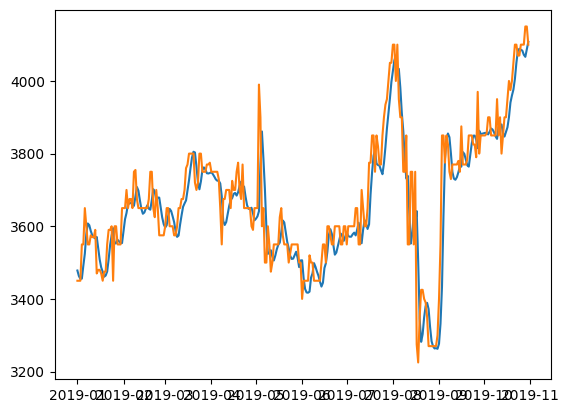

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

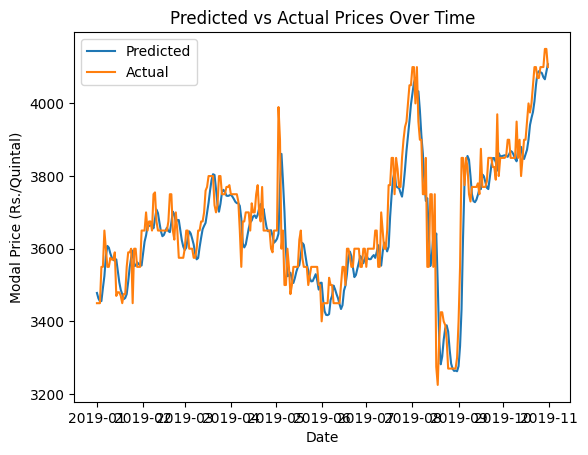

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

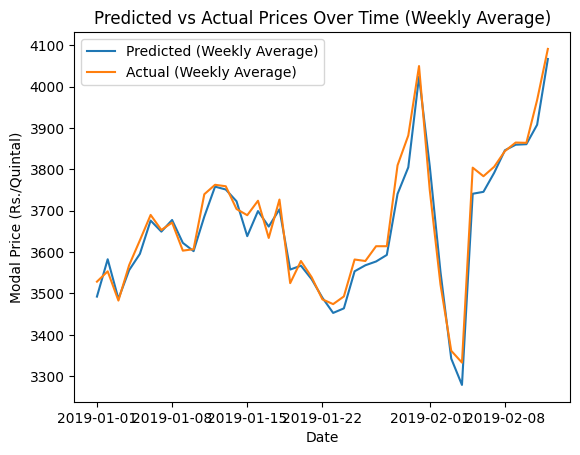

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

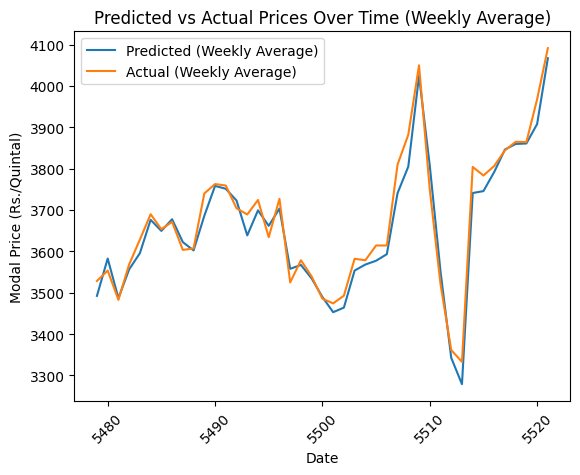

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
